# Keras
Fonte: https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/
https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [13]:
#!pip install keras 

In [3]:
import tensorflow.keras as keras; 
import tensorflow as tf; 

import numpy as np
import pandas as pd
from matplotlib import pyplot

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

print("Versão Keras :" , keras.__version__)
print("Versão Tensorflow :" , tf.__version__)

Versão Keras : 2.2.4-tf
Versão Tensorflow : 2.1.0


## Passos para criar uma rede Neural usando Keras
* Preparação dos dados de entrada e saída
* Normalização
* Definição das camadas de Entrada e Saída
    * Definição depende da natureza do problema: regressão, classificação, multilabel, multiclasse, etec
* Definição das camadas escondidas
    * Busca por hiperparâmetros
* Compilação
* Execução
* Avaliação
* Colocar em produção
    * Salvar pesos da Rede Neural Treinada
    * Recuperar pesos para realizar inferência
    * Paralelizar processo de inferência


* A estrutura de dados principal do Keras é o objeto <strong>model</strong> 

* O tipo mais simples de modelo é o <strong>Sequential</strong> (pilha linear de camadas). 

* Outros recursos da API Keras permite criar gráfos arbitrários de camadas.

In [4]:
model = Sequential()

* Empilhando camadas (método add)

In [5]:
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

* Keras pode ser montado com suporte de Tensorflow, Theano e CNTK

* Keras oferece suporte quanto ao uso de várias GPUs e treinamento distribuído (Horovod)

* Os modelos Keras podem ser transformados em estimadores de TensorFlow e treinados em clusters de GPUs no Google Cloud

* Keras pode ser executado no Spark via Dist-Keras (do CERN) e Elephas

## Especificando formato da entrada

* O modelo precisa saber que formato de entrada será recebido. Esse formato é definido na primeira camada em um modelo Sequential, as camadas subsequentes definem a entrada e saída de acordo com os parâmetros da Rede Neural.

* Como definir o formato de entrada:

    * Argumento <strong>input_shape</strong> na primeira camada. Essa é uma tupla de forma (uma tupla de números inteiros ou Nenhuma, em que Nenhuma indica que qualquer número inteiro positivo pode ser esperado). Em input_shape, a dimensão do lote não está incluída.

    * Algumas camadas 2D, como Dense, permitem a especificação de sua forma de entrada por meio do argumento <strong>input_dim</strong>, e algumas camadas temporais 3D suportam os argumentos <strong>input_dim</strong> e <strong>input_length</strong>.


In [6]:
model.add(Dense(units=64, activation='relu', input_dim=100))

In [124]:
model.add(Dense(units=64, activation='relu', input_shape=(100,)))

## Compilação

Antes de treinar um modelo, você precisa configurar o processo de aprendizado, que é feito pelo método de compilação. 

Ele recebe três argumentos:

* <strong>optimizer</strong> (Otimizador). Pode ser o identificador de sequência de um otimizador existente (como por exemplos rmsprop ou adagrad) ou uma instância da classe Optimizer.

* <strong>loss</strong> (função de perda). Esse é o objetivo que o modelo tentará minimizar. Pode ser o identificador de cadeia de uma função de perda existente (como categorical_crossentropy ou mse) ou pode ser uma função objetiva. 

* <strong>metrics</strong> (lista de métricas). Para qualquer problema de classificação, você desejará definir isso como métricas = ['precisão']. Uma métrica pode ser o identificador de sequência de uma métrica existente ou uma função de métrica personalizada.


* Exemplo de compilação

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

* Loss para multiclasse

In [ ]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

* Loss para classificação binária

In [ ]:
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* Loss para regressão

In [90]:
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

* Métrica customizada

In [126]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

## Treinando um modelo

* Os modelos Keras são treinados em matrizes Numpy de dados e rótulos de entrada. 

* Para treinar um modelo, você normalmente usa a função <strong>fit</strong>

* <strong>x</strong>: Matrix com amostrar para treinar o modelo (N dimensões)

* <strong>y</strong>: valor a ser predito (associado com cada amostra x)

* <strong>batch_size</strong>: Número de amostras por atualização de gradiente.

* <strong>Épocas</strong>: Número de épocas para treinar o modelo. Uma época é uma iteração sobre todos os dados x e y fornecidos. 

* <strong>verbose</strong>: monitora execução do modelo. 0 = silencioso, 1 = barra de progresso, 2 = uma linha por época.

## Teste de rede Neural com duas classes

In [20]:
#Topologia da Rede Neural

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='relu'))

#Compilando o modelo
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Gerando dados aleatórios
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

#Treinando o modelo usando 10 época e 32 amostrar para atualização do gradiente
history = model.fit(data, labels, epochs=10, batch_size=32, verbose=2)

Train on 1000 samples
Epoch 1/10
1000/1000 - 0s - loss: 2.7236 - accuracy: 0.4570
Epoch 2/10
1000/1000 - 0s - loss: 1.7997 - accuracy: 0.4780
Epoch 3/10
1000/1000 - 0s - loss: 1.3585 - accuracy: 0.4810
Epoch 4/10
1000/1000 - 0s - loss: 1.1944 - accuracy: 0.4910
Epoch 5/10
1000/1000 - 0s - loss: 1.0083 - accuracy: 0.5040
Epoch 6/10
1000/1000 - 0s - loss: 0.8596 - accuracy: 0.5250
Epoch 7/10
1000/1000 - 0s - loss: 0.7876 - accuracy: 0.5320
Epoch 8/10
1000/1000 - 0s - loss: 0.7366 - accuracy: 0.5160
Epoch 9/10
1000/1000 - 0s - loss: 0.7238 - accuracy: 0.5560
Epoch 10/10
1000/1000 - 0s - loss: 0.7084 - accuracy: 0.5520


## Avaliando desempenho do modelo treinado

* função evaluate que mostra o calos de loss e acurácia após o treino
* As métricas mais elementares são a curva de loss e a curva da métrica usada

1000/1000 [==============================] - 0s 130us/sample - loss: 0.6772 - accuracy: 0.5760
[0.6771532878875732, 0.576]


[Text(0.5, 15.000000000000028, 'Época')]

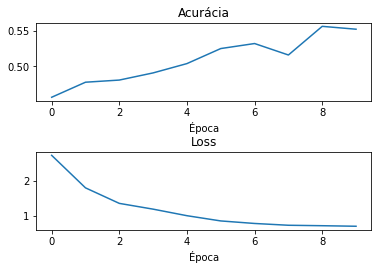

In [21]:
score = model.evaluate(data, labels)
print(score)

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
axs[0].plot(x)
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
axs[1].plot(x)
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

## Realizando predições com o modelo
* função predict

In [22]:
model.predict(data[:5])

array([[0.7533896 ],
       [0.76828325],
       [0.55078775],
       [0.43616724],
       [0.67512804]], dtype=float32)

## Salvando pesos da rede neural
* Usando pesos de uma rede neural treinada para realizar inferência


In [23]:
model.save('model.h5')  # creates a HDF5 file 'my_model.h5'

* carregando pesos salvos

In [24]:
model2 = load_model('model.h5')
model2.predict(data[:5])


array([[0.7533896 ],
       [0.76828325],
       [0.55078775],
       [0.43616724],
       [0.67512804]], dtype=float32)

## Exemplo de rede neural para regressão

In [25]:


#gerando dados de regressão
X, y = make_regression(n_samples=1000, n_features=2, noise=0.1, random_state=1)

scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(1000,1))

X = scalarX.transform(X)
y = scalarY.transform(y.reshape(1000,1))

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(X, y, epochs=50, verbose=1)


Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 327us/sample - loss: 0.2365 - mse: 0.2365
Epoch 2/50
1000/1000 [==============================] - 0s 132us/sample - loss: 0.1776 - mse: 0.1776
Epoch 3/50
1000/1000 [==============================] - 0s 131us/sample - loss: 0.1190 - mse: 0.1190
Epoch 4/50
1000/1000 [==============================] - 0s 133us/sample - loss: 0.0709 - mse: 0.0709
Epoch 5/50
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0431 - mse: 0.0431
Epoch 6/50
1000/1000 [==============================] - 0s 135us/sample - loss: 0.0322 - mse: 0.0322
Epoch 7/50
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0296 - mse: 0.0296
Epoch 8/50
1000/1000 [==============================] - 0s 133us/sample - loss: 0.0289 - mse: 0.0289
Epoch 9/50
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0285 - mse: 0.0285
Epoch 10/50
1000/1000 [==============================] - 0s 133us/sam

In [158]:
print(history.history)

{'loss': [0.1902032701969147, 0.1339064164161682, 0.0852323670387268, 0.048926315248012546, 0.025808064464479686, 0.014475880917161702, 0.010042559541761874, 0.008428716290742159, 0.007669945746660233, 0.007171256899833679, 0.0067645530328154565, 0.006412370286881923, 0.005971114307641983, 0.005496215470135212, 0.00494727580063045, 0.004262407671660185, 0.0034050717540085314, 0.0024925297885201874, 0.001686805073171854, 0.0011125111611327157, 0.0007412332868552767, 0.0004735129103064537, 0.0003314417035289807, 0.00025246782282192727, 0.00019912061508512124, 0.00016039748048933688, 0.0001292264222392987, 0.00011043401491497207, 9.656168166111456e-05, 8.205338211701019e-05, 7.225997888599523e-05, 6.342588197821897e-05, 5.4294421253644034e-05, 4.6818773496852375e-05, 3.9810883352856764e-05, 3.412112703563252e-05, 3.0031160965336313e-05, 2.6315197681469726e-05, 2.294166839283207e-05, 2.0435616534086876e-05, 1.858349189274122e-05, 1.6720245238502685e-05, 1.543182698378587e-05, 1.41281421492

1000/1000 [==============================] - 0s 106us/sample - loss: 0.0052 - mse: 0.0052
[0.0052078644186258315, 0.0052078646]


[Text(0.5, 15.000000000000028, 'Época')]

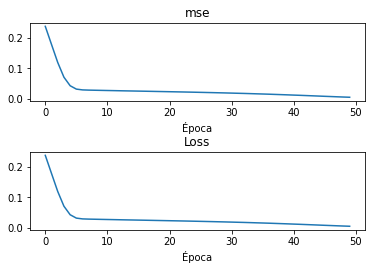

In [26]:
score = model.evaluate(X, y)
print(score)

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['mse']
axs[0].plot(x)
axs[0].set_title('mse')
axs[0].set(xlabel='Época')

x=history.history['loss']
axs[1].plot(x)
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

## Teste de Rede Neural com N-classes

In [27]:
# For a single-input model with 10 classes (categorical classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=1000))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((10000, 1000))
labels = np.random.randint(10, size=(10000, 1))

# Convertendo labels em categorias one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 157us/sample - loss: 2.3120 - accuracy: 0.1027
Epoch 2/10
10000/10000 [==============================] - 1s 139us/sample - loss: 2.3030 - accuracy: 0.0984
Epoch 3/10
10000/10000 [==============================] - 1s 140us/sample - loss: 2.3024 - accuracy: 0.1037
Epoch 4/10
10000/10000 [==============================] - 1s 137us/sample - loss: 2.3024 - accuracy: 0.1010
Epoch 5/10
10000/10000 [==============================] - 1s 139us/sample - loss: 2.3024 - accuracy: 0.1043
Epoch 6/10
10000/10000 [==============================] - 1s 141us/sample - loss: 2.3024 - accuracy: 0.1043
Epoch 7/10
10000/10000 [==============================] - 1s 137us/sample - loss: 2.3024 - accuracy: 0.1008
Epoch 8/10
10000/10000 [==============================] - 1s 137us/sample - loss: 2.3024 - accuracy: 0.1043
Epoch 9/10
10000/10000 [==============================] - 1s 137us/sample - loss: 2.3024 - accuracy: 0.1030
Epoch

## Escolhendo parâmetros da Rede Neural
* Uma técnica para lidar com a complexidade de parâmetros é o processo de busca por hiperparâmetros automatizado (Usando scikit-learn por exemplo)

In [28]:
# Readying neural network model
def build_nn(activation = 'relu', optimizer = 'Adam'):
   
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(128, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'epochs':[15,20],
              'batch_size':[128,256],
              #'activation':['softmax','relu']
              #'optimizer':['RMSprop','Adam']
              #'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              'optimizer' :           ['Adam', 'Nadam'],
              #'dropout_rate' :        [0.2, 0.3],
              'activation' :          ['relu', 'elu', 'softmax']
             }

seed = 7
import numpy as np
np.random.seed(seed)

dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]

model = KerasClassifier(build_fn = build_nn, verbose=1)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

Train on 768 samples
Epoch 1/15
768/768 [==============================] - 0s 295us/sample - loss: 2.3173 - accuracy: 0.4661
Epoch 2/15
768/768 [==============================] - 0s 25us/sample - loss: 1.4252 - accuracy: 0.5521
Epoch 3/15
768/768 [==============================] - 0s 32us/sample - loss: 1.1892 - accuracy: 0.6016
Epoch 4/15
768/768 [==============================] - 0s 33us/sample - loss: 0.8118 - accuracy: 0.5911
Epoch 5/15
768/768 [==============================] - 0s 33us/sample - loss: 0.8134 - accuracy: 0.5690
Epoch 6/15
768/768 [==============================] - 0s 34us/sample - loss: 0.7317 - accuracy: 0.6471
Epoch 7/15
768/768 [==============================] - 0s 33us/sample - loss: 0.6915 - accuracy: 0.6445
Epoch 8/15
768/768 [==============================] - 0s 34us/sample - loss: 0.6587 - accuracy: 0.6471
Epoch 9/15
768/768 [==============================] - 0s 34us/sample - loss: 0.6497 - accuracy: 0.6445
Epoch 10/15
768/768 [==============================

In [35]:
print(grid_result)
print(grid_result.best_params_)
print(grid_result.best_score_)

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff3d4031f90>,
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'elu', 'softmax'],
                         'batch_size': [128, 256], 'epochs': [15, 20],
                         'optimizer': ['Adam', 'Nadam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'activation': 'relu', 'batch_size': 128, 'epochs': 15, 'optimizer': 'Adam'}
nan


## Exemplos de Rede Neural
* Primeiro exemplo

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Using TensorFlow backend.


Epoch 1/20
1000/1000 [==============================] - 0s 142us/step - loss: 2.4141 - accuracy: 0.0970
Epoch 2/20
1000/1000 [==============================] - 0s 38us/step - loss: 2.3822 - accuracy: 0.0950
Epoch 3/20
1000/1000 [==============================] - 0s 36us/step - loss: 2.3366 - accuracy: 0.1070
Epoch 4/20
1000/1000 [==============================] - 0s 37us/step - loss: 2.3406 - accuracy: 0.0900
Epoch 5/20
1000/1000 [==============================] - 0s 38us/step - loss: 2.3176 - accuracy: 0.1050
Epoch 6/20
1000/1000 [==============================] - 0s 38us/step - loss: 2.3169 - accuracy: 0.1010
Epoch 7/20
1000/1000 [==============================] - 0s 38us/step - loss: 2.3077 - accuracy: 0.1120
Epoch 8/20
1000/1000 [==============================] - 0s 38us/step - loss: 2.3122 - accuracy: 0.1140
Epoch 9/20
1000/1000 [==============================] - 0s 39us/step - loss: 2.3014 - accuracy: 0.1100
Epoch 10/20
1000/1000 [==============================] - 0s 38us/step - 

* Segundo exemplo

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 0s 178us/step - loss: 0.7135 - accuracy: 0.5200
Epoch 2/20
1000/1000 [==============================] - 0s 42us/step - loss: 0.7201 - accuracy: 0.5060
Epoch 3/20
1000/1000 [==============================] - 0s 45us/step - loss: 0.7125 - accuracy: 0.5010
Epoch 4/20
1000/1000 [==============================] - 0s 44us/step - loss: 0.7076 - accuracy: 0.5010
Epoch 5/20
1000/1000 [==============================] - 0s 45us/step - loss: 0.7091 - accuracy: 0.5000
Epoch 6/20
1000/1000 [==============================] - 0s 45us/step - loss: 0.6980 - accuracy: 0.5280
Epoch 7/20
1000/1000 [==============================] - 0s 43us/step - loss: 0.7004 - accuracy: 0.5190
Epoch 8/20
1000/1000 [==============================] - 0s 44us/step - loss: 0.6876 - accuracy: 0.5480
Epoch 9/20
1000/1000 [==============================] - 0s 44us/step - loss: 0.6975 - accuracy: 0.5120
Epoch 10/20
1000/1000 [==============================] - 0s 44us/step - 

* Validação Cruzada para Avaliar Parâmetros da Rede Neural

## Obtendo valor de uma camada intermediaria

In [33]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Recurso de parada antecipada
* Parar o treino quando já tiver alcançado um determinado limiar de acurácia

In [39]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

#model.fit(x, y, validation_split=0.2, callbacks=[early_stopping])
history=model.fit(x_train, y_train,
          epochs=200,
          batch_size=128, callbacks=[early_stopping])
score = model.evaluate(x_test, y_test, batch_size=128)



Epoch 1/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.5689 - accuracy: 0.7150
Epoch 2/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5680 - accuracy: 0.7050
Epoch 3/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.5698 - accuracy: 0.6970
Epoch 4/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5672 - accuracy: 0.7170
Epoch 5/200
1000/1000 [==============================] - 0s 44us/step - loss: 0.5804 - accuracy: 0.6980
Epoch 6/200


/home/silvio/.conda/envs/DL/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1000/1000 [==============================] - 0s 45us/step - loss: 0.5778 - accuracy: 0.7100
Epoch 7/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5595 - accuracy: 0.7350
Epoch 8/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.5716 - accuracy: 0.7250
Epoch 9/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.5595 - accuracy: 0.7230
Epoch 10/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5695 - accuracy: 0.7110
Epoch 11/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5685 - accuracy: 0.7060
Epoch 12/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.5611 - accuracy: 0.7030
Epoch 13/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5456 - accuracy: 0.7300
Epoch 14/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5636 - accuracy: 0.7290
Epoch 15/200
1000/1000 [==============================] - 0s 45us/step 

1000/1000 [==============================] - 0s 46us/step - loss: 0.4821 - accuracy: 0.7580
Epoch 162/200
1000/1000 [==============================] - 0s 44us/step - loss: 0.4906 - accuracy: 0.7680
Epoch 163/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.5006 - accuracy: 0.7550
Epoch 164/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.4819 - accuracy: 0.7670
Epoch 165/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.5077 - accuracy: 0.7480
Epoch 166/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.5145 - accuracy: 0.7530
Epoch 167/200
1000/1000 [==============================] - 0s 45us/step - loss: 0.4818 - accuracy: 0.7700
Epoch 168/200
1000/1000 [==============================] - 0s 46us/step - loss: 0.4919 - accuracy: 0.7680
Epoch 169/200
1000/1000 [==============================] - 0s 47us/step - loss: 0.4981 - accuracy: 0.7640
Epoch 170/200
1000/1000 [==============================] - 0

In [35]:
history=model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 0s 42us/step - loss: 0.5714 - accuracy: 0.7020
Epoch 2/20
1000/1000 [==============================] - 0s 41us/step - loss: 0.5767 - accuracy: 0.6920
Epoch 3/20
1000/1000 [==============================] - 0s 42us/step - loss: 0.6023 - accuracy: 0.6820
Epoch 4/20
1000/1000 [==============================] - 0s 42us/step - loss: 0.5710 - accuracy: 0.7000
Epoch 5/20
1000/1000 [==============================] - 0s 41us/step - loss: 0.5812 - accuracy: 0.6900
Epoch 6/20
1000/1000 [==============================] - 0s 41us/step - loss: 0.5738 - accuracy: 0.7010
Epoch 7/20
1000/1000 [==============================] - 0s 41us/step - loss: 0.5767 - accuracy: 0.7130
Epoch 8/20
1000/1000 [==============================] - 0s 41us/step - loss: 0.5790 - accuracy: 0.6970
Epoch 9/20
1000/1000 [==============================] - 0s 41us/step - loss: 0.5874 - accuracy: 0.6920
Epoch 10/20
1000/1000 [==============================] - 0s 42us/step - l

No handles with labels found to put in legend.


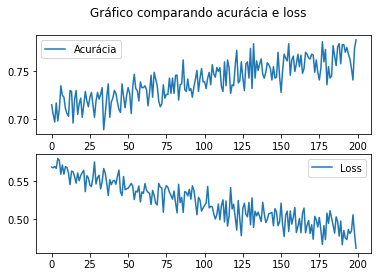

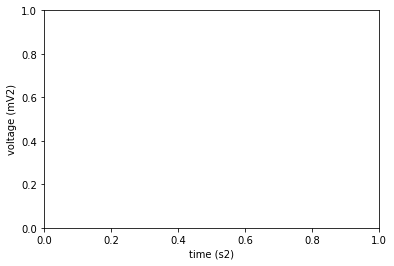

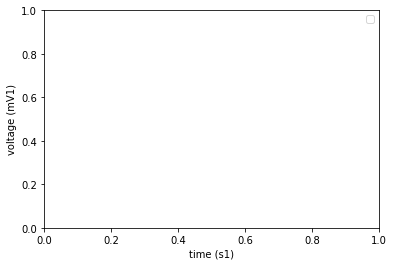

[Text(0.5, 15.000000000000028, 'Época')]

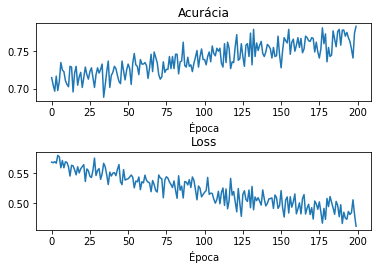

## O que significa "amostra", "lote", "época"?


* Amostra: um elemento de um conjunto de dados.
Exemplo: uma imagem é uma amostra em uma rede convolucional
Exemplo: um arquivo de áudio é uma amostra para um modelo de reconhecimento de fala

* Lote: um conjunto de N amostras. As amostras em um lote são processadas independentemente, em paralelo. Se estiver treinando, um lote resultará em apenas uma atualização para o modelo.
Um lote geralmente aproxima a distribuição dos dados de entrada melhor do que uma única entrada. Quanto maior o lote, melhor a aproximação; no entanto, também é verdade que o lote levará mais tempo para processar e ainda resultará em apenas uma atualização. Para inferência (avaliação / previsão), é recomendável escolher um tamanho de lote tão grande quanto você puder pagar sem ficar sem memória (pois lotes maiores geralmente resultam em uma avaliação / previsão mais rápida).

* Época: um ponto de corte arbitrário, geralmente definido como "uma passagem por todo o conjunto de dados", usado para separar o treinamento em fases distintas, o que é útil para registro e avaliação periódica.
Ao usar validation_data ou validation_split com o método de ajuste dos modelos Keras, a avaliação será executada no final de cada época.
No Keras, há a capacidade de adicionar retornos de chamada projetados especificamente para serem executados no final de uma época. Exemplos disso são mudanças na taxa de aprendizado e verificação de modelo (salvamento).


## Escolhendo algoritmos de otimização de modelo

* Os algoritmos de otimização que usam todo o conjunto de treinamento são chamados métodos em lote ou gradiente determinístico, porque processam todos os exemplos de treinamento simultaneamente em um lote grande.

* Algoritmos de otimização que usam apenas um único exemplo de cada vez são chamados de métodos estocásticos ou, às vezes, online. O termo online geralmente é reservado para o caso em que os exemplos são extraídos de um fluxo de exemplos criados continuamente, e não de um conjunto de treinamento de tamanho fixo sobre o qual são feitas várias passagens.

* Batch Gradient Descent. O tamanho do batch é definido como o número total de exemplos no conjunto de dados de treinamento.
* Stochastic Gradient Descent. O tamanho do batch é igual a 1
* Minibatch Gradient Descent. O tamanho do batch é definido como mais de um e menor que o número total de exemplos no conjunto de dados de treinamento.

# Abaixo o treino é feito usando Batch Gradient Descent. 


In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

* A execução do exemplo primeiro relata o desempenho do modelo nos conjuntos de dados de trem e teste.
* Seus resultados específicos podem variar de acordo com a natureza estocástica do algoritmo de aprendizado; considere executar o exemplo algumas vezes.
* Nesse caso, podemos ver que o desempenho foi semelhante entre os conjuntos de trens e testes com 81% e 83%, respectivamente.
* O resultado do treino mostra que o acurácia estabilizou a partir da época 100

# Rodando com batch igual a 1

In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# A instabilidade do modelo sugere que o learning rate pode não estar adequado

In [ ]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Treinando modelo usando mini-batch

In [ ]:
# mlp for the blobs problem with minibatch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()